# Desarrollo Ejercicio Kilimo

### **Problema planteado:** Desarrolle un pipeline completo para predecir el rendimiento de cultivos de maíz usando datos históricos de campo, clima y manejo agronómico.
### El objetivo es crear una solución que permita a los agricultores tomar decisiones informadas sobre sus cultivos.

# Parte 1. **Data Engineering**

## **1.1 Pipeline de Datos**

## **Carga de datos**

In [1]:
import pandas as pd

In [2]:
data= pd.read_csv("../dataset/yield_df.csv")

In [3]:
data

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [5]:
data.head(10)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37
5,5,Albania,Wheat,1990,30197,1485.0,121.0,16.37
6,6,Albania,Maize,1991,29068,1485.0,121.0,15.36
7,7,Albania,Potatoes,1991,77818,1485.0,121.0,15.36
8,8,Albania,"Rice, paddy",1991,28538,1485.0,121.0,15.36
9,9,Albania,Sorghum,1991,6667,1485.0,121.0,15.36


## **Exploración, limpieza y curación de los datos**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Variables en el dataset

data.columns.values

array(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype=object)

In [9]:
#Tipos de datos

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [10]:
 ## Eliminamos columna irrelevante
    data=data.drop(['Unnamed: 0'], axis=1)

In [11]:
data.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


### Dado que el maíz es nuestro cultivo objetivo, es necesario filtrar el conjunto de datos para conservar únicamente las observaciones correspondientes a este cultivo

In [12]:
#Exploramos los niveles de la variable Item para ver si existen otras varientes en el nombre del cultivo, por ej. "Corn" o si hay casos en donde está mal tipiado el cultivo

data["Item"].unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

In [13]:
data_fil=data[data["Item"]=='Maize']

In [14]:
data_fil

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
6,Albania,Maize,1991,29068,1485.0,121.00,15.36
12,Albania,Maize,1992,24876,1485.0,121.00,16.06
18,Albania,Maize,1993,24185,1485.0,121.00,16.05
23,Albania,Maize,1994,25848,1485.0,201.00,16.96
...,...,...,...,...,...,...,...
28203,Zimbabwe,Maize,2009,4642,657.0,3269.99,20.52
28211,Zimbabwe,Maize,2010,8751,657.0,3305.17,21.17
28219,Zimbabwe,Maize,2011,6568,657.0,3340.35,20.78
28227,Zimbabwe,Maize,2012,7912,657.0,3375.53,20.52


In [38]:
data_fil["Item"].unique()

array(['Maize'], dtype=object)

In [16]:
## Exloramos valores faltantes

data_fil.isna().sum() 

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

**No existen valores faltantes en ninguna de las variables**

In [77]:
## Exloramos si hay valores nulos

cols = data_fil[data_fil == 0].count(axis=0)
cols

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

**No existen valores nulos en ninguna de las variables**

In [44]:
#Exploramos si existen valores negativos

data_fil[["hg/ha_yield", "average_rain_fall_mm_per_year", "pesticides_tonnes", "avg_temp"]].describe()

,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,4121.000000,4121.000000,4121.000000,4121.000000
mean,36310.070614,1098.124242,32765.983322,19.925159
std,27456.370877,721.559071,54088.622824,6.654389
min,849.000000,51.000000,0.040000,1.610000
25%,17086.000000,537.000000,1597.000000,15.670000
50%,25401.000000,1020.000000,14485.330000,20.810000
75%,48243.000000,1622.000000,43720.040000,25.920000
max,207556.000000,3240.000000,367778.000000,30.650000


**No existen valores negativos en ninguna de las variables**

In [46]:
#Determinamos los niveles (categorías) de la variable Area para determinar anomalías

data_fil["Area"].unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh',
       'Belarus', 'Belgium', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'France', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India',
       'Indonesia', 'Iraq', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan',
       'Kenya', 'Lebanon', 'Lesotho', 'Libya', 'Lithuania', 'Madagascar',
       'Malawi', 'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Pakistan',
       'Papua New Guinea', 'Peru', 'Poland', 'Portugal', 'Qatar',
       'Romania', 'Rwanda', 'Saudi Arabia', '

## **Exploración visual de las variables**

In [48]:
data_fil.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

- **Variables cualitativas**

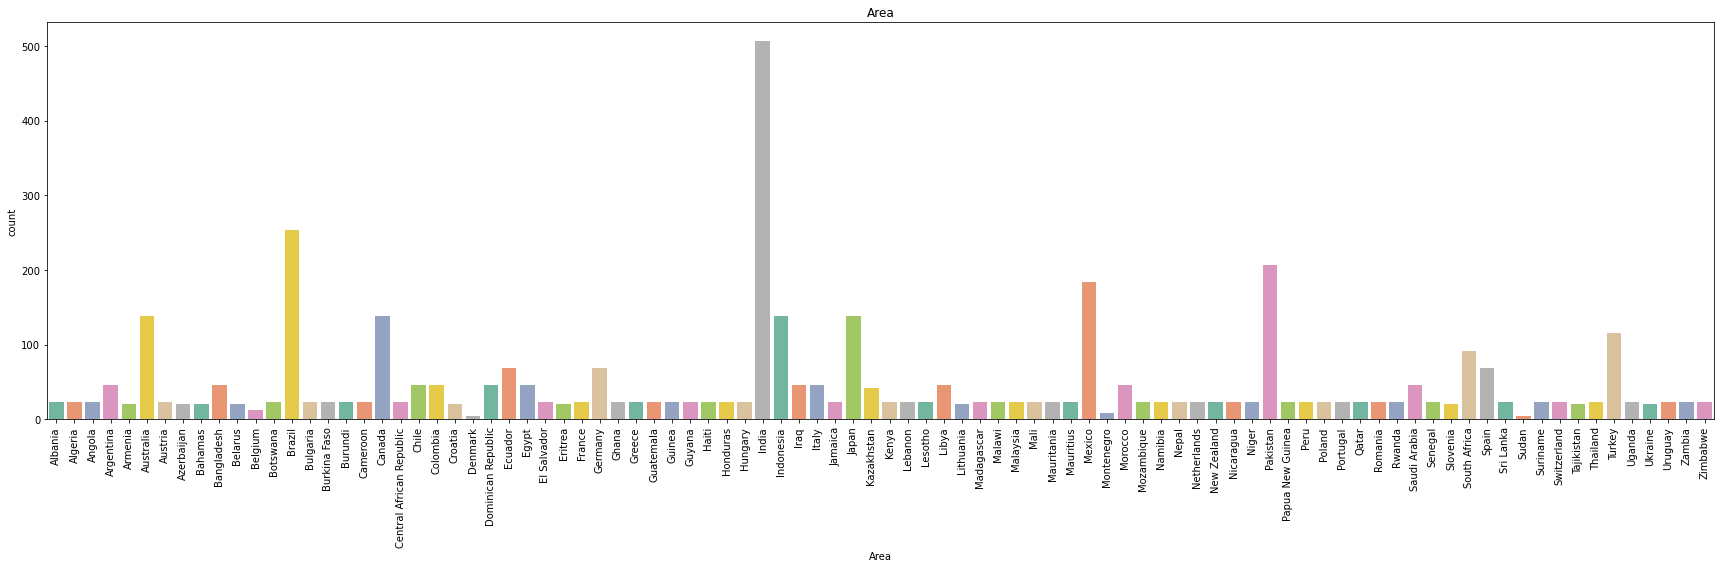

In [68]:
fig, ax = plt.subplots(figsize=(24, 8)) 

sns.countplot(x=data_fil['Area'], ax=ax, palette='Set2')
ax.set_title('Area')
ax.tick_params(axis='x', rotation=90)


plt.tight_layout()
plt.show()

**A partir del gráfico, se observa que algunos países, como India, Brasil, Pakistán y México, presentan un mayor número de casos en comparación con el resto.**

- **Variables cuantitativas discretas**

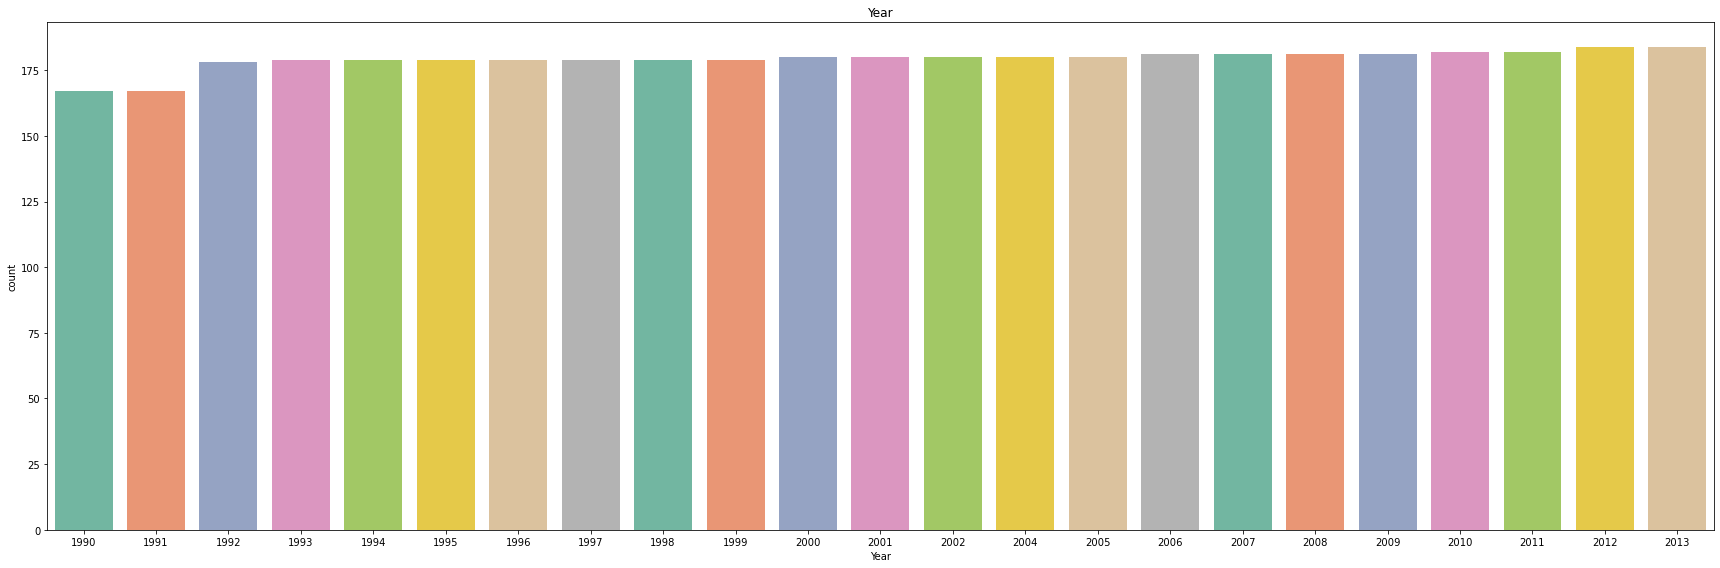

In [158]:
fig, ax = plt.subplots(figsize=(24, 8)) 

sns.countplot(x=data_fil['Year'], ax=ax, palette='Set2')
ax.set_title('Year')
ax.tick_params(axis='x', rotation=0)


plt.tight_layout()
plt.show()

**La cantidad de casos no presenta variaciones sustanciales a lo largo de los distintos años** 

- **Variables cuantitativas continuas**

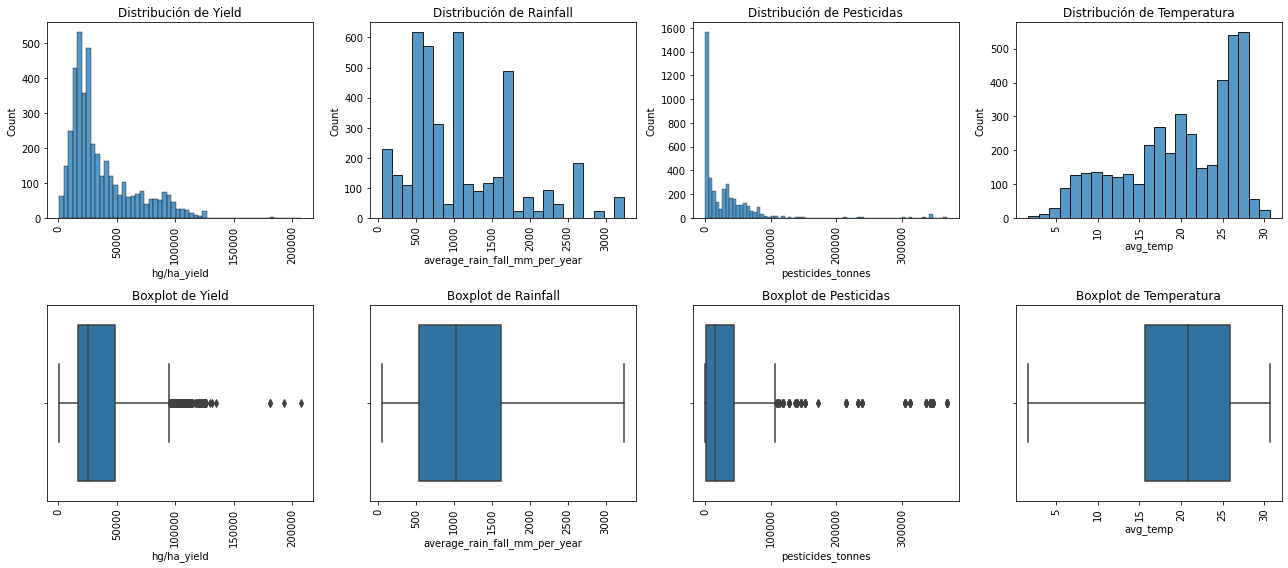

In [72]:
fig, axes = plt.subplots(2, 4, figsize=(18, 8))  
sns.histplot(data=data_fil, x="hg/ha_yield", ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Yield')
axes[0, 0].tick_params(axis='x', rotation=90)

sns.boxplot(data=data_fil, x="hg/ha_yield", ax=axes[1, 0])
axes[1, 0].set_title('Boxplot de Yield')
axes[1, 0].tick_params(axis='x', rotation=90)

sns.histplot(data=data_fil, x="average_rain_fall_mm_per_year", ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Rainfall')
axes[0, 1].tick_params(axis='x', rotation=90)

sns.boxplot(data=data_fil, x="average_rain_fall_mm_per_year", ax=axes[1, 1])
axes[1, 1].set_title('Boxplot de Rainfall')
axes[1, 1].tick_params(axis='x', rotation=90)


sns.histplot(data=data_fil, x="pesticides_tonnes", ax=axes[0, 2])
axes[0, 2].set_title('Distribución de Pesticidas')
axes[0, 2].tick_params(axis='x', rotation=90)

sns.boxplot(data=data_fil, x="pesticides_tonnes", ax=axes[1, 2])
axes[1, 2].set_title('Boxplot de Pesticidas')
axes[1, 2].tick_params(axis='x', rotation=90)


sns.histplot(data=data_fil, x="avg_temp", ax=axes[0, 3])
axes[0, 3].set_title('Distribución de Temperatura')
axes[0, 3].tick_params(axis='x', rotation=90)

sns.boxplot(data=data_fil, x="avg_temp", ax=axes[1, 3])
axes[1, 3].set_title('Boxplot de Temperatura')
axes[1, 3].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [78]:
data_fil.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

**Se observa que tanto el rendimiento del cultivo de maíz como la cantidad de pesticidas presentan una distribución sesgada hacia la derecha. Por este motivo, se procederá a explorar más en detalle los datos de ambas variables**

In [81]:
#Pesticidas

data_fil["pesticides_tonnes"].describe()

count      4121.000000
mean      32765.983322
std       54088.622824
min           0.040000
25%        1597.000000
50%       14485.330000
75%       43720.040000
max      367778.000000
Name: pesticides_tonnes, dtype: float64

In [80]:
q25=data_fil.pesticides_tonnes.quantile(.25)
q75=data_fil.pesticides_tonnes.quantile(.75)
RI=q75-q25
min=q25-1.5*RI
max=q75+1.5*RI
print("Nuevo mínimo=", min)  
print("Nuevo máximo=", max)

Nuevo mínimo= -61587.56
Nuevo máximo= 106904.6


In [85]:
data_fil2=data_fil[data_fil["pesticides_tonnes"] > max]

In [86]:
data_fil2

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
715,Argentina,Maize,2012,57346,591.0,136185.08,18.18
716,Argentina,Maize,2012,57346,591.0,136185.08,18.43
731,Argentina,Maize,2013,66037,591.0,171945.54,16.45
732,Argentina,Maize,2013,66037,591.0,171945.54,16.88
3246,Brazil,Maize,1997,26228,1761.0,110276.11,21.91
...,...,...,...,...,...,...,...
6775,Colombia,Maize,2005,27537,3240.0,117881.45,27.56
6776,Colombia,Maize,2005,27537,3240.0,117881.45,22.69
8795,France,Maize,1997,90651,867.0,109792.00,11.59
8801,France,Maize,1998,84528,867.0,107753.00,11.25


In [155]:
data_fil2.groupby("Area").agg(["mean", "min", "max", "count"])

Year                   hg/ha_yield                      \
               mean   min   max count        mean    min    max count   
Area                                                                    
Argentina  2012.500  2012  2013     4   61691.500  57346  66037     4   
Brazil     2005.125  1997  2013   176   35986.125  26228  52536   176   
Colombia   2005.000  2005  2005     2   27537.000  27537  27537     2   
France     1998.000  1997  1999     3   88234.000  84528  90651     3   

          average_rain_fall_mm_per_year                        \
                                   mean     min     max count   
Area                                                            
Argentina                         591.0   591.0   591.0     4   
Brazil                           1761.0  1761.0  1761.0   176   
Colombia                         3240.0  3240.0  3240.0     2   
France                            867.0   867.0   867.0     3   

          pesticides_tonnes                               avg_temp         \
                       mean        min        max count       mean    min   
Area                                                                        
Argentina     154065.310000  136185.08  171945.54     4  17.485000  16.45   
Brazil        239646.229375  110276.11  367778.00   176  22.740170  17.57   
Colombia      117881.450000  117881.45  117881.45     2  25.125000  22.69   
France        110746.666667  107753.00  114695.00     3  11.556667  11.25   

                        
             max count  
Area                    
Argentina  18.43     4  
Brazil     28.76   176  
Colombia   27.56     2  
France     11.83     3

In [151]:
##Rendimiento

q25=data_fil["hg/ha_yield"].quantile(.25)
q75=data_fil["hg/ha_yield"].quantile(.75)
RI=q75-q25
min=q25-1.5*RI
max=q75+1.5*RI
print("Nuevo mínimo=", min)  
print("Nuevo máximo=", max)

Nuevo mínimo= -29649.5
Nuevo máximo= 94978.5


In [152]:
data_fil3=data_fil[data_fil["hg/ha_yield"] > max]
data_fil3

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
1802,Austria,Maize,1997,97800,1110.0,3689.6,8.37
1806,Austria,Maize,1998,96100,1110.0,3340.3,9.01
1810,Austria,Maize,1999,96000,1110.0,3418.6,9.17
1814,Austria,Maize,2000,98600,1110.0,3563.2,10.08
1822,Austria,Maize,2002,99815,1110.0,3079.2,9.62
...,...,...,...,...,...,...,...
26265,Tajikistan,Maize,2009,98893,691.0,258.1,8.42
26271,Tajikistan,Maize,2010,120521,691.0,262.1,8.98
26277,Tajikistan,Maize,2011,121228,691.0,264.6,8.45
26283,Tajikistan,Maize,2012,125670,691.0,264.6,7.71


In [154]:
data_fil3.groupby("Area").agg(["mean", "min", "max", "count"])

Year                      hg/ha_yield                  \
                    mean   min   max count           mean     min     max   
Area                                                                        
Austria      2004.857143  1997  2012    14  102118.642857   96000  113173   
Belgium      2006.769231  2000  2013    13  115525.230769  101929  131278   
Canada       2011.500000  2010  2013    12   96631.500000   95878   97385   
Chile        2008.000000  2002  2013    20  109140.300000  101411  119978   
France       2011.000000  2011  2011     1   99668.000000   99668   99668   
Germany      2010.000000  2008  2012    12  101661.000000   97500  106243   
Greece       2001.590909  1990  2013    22  101375.818182   95128  107069   
Italy        2002.666667  1997  2011    12   96314.166667   95135   98033   
Netherlands  2007.000000  1998  2013    10  116453.900000   97046  129954   
New Zealand  2002.947368  1991  2013    19  106104.526316   96287  115496   
Qatar        2001.434783  1990  2013    23  136593.000000  118571  207556   
Spain        2007.333333  2001  2013    36  102109.500000   95142  113738   
Switzerland  2007.666667  2000  2013     9  101730.555556   96142  114447   
Tajikistan   2011.000000  2009  2013     5  118227.800000   98893  125670   

                  average_rain_fall_mm_per_year                        \
            count                          mean     min     max count   
Area                                                                    
Austria        14                        1110.0  1110.0  1110.0    14   
Belgium        13                         847.0   847.0   847.0    13   
Canada         12                         537.0   537.0   537.0    12   
Chile          20                        1522.0  1522.0  1522.0    20   
France          1                         867.0   867.0   867.0     1   
Germany        12                         700.0   700.0   700.0    12   
Greece         22                         652.0   652.0   652.0    22   
Italy          12                         832.0   832.0   832.0    12   
Netherlands    10                         778.0   778.0   778.0    10   
New Zealand    19                        1732.0  1732.0  1732.0    19   
Qatar          23                          74.0    74.0    74.0    23   
Spain          36                         636.0   636.0   636.0    36   
Switzerland     9                        1537.0  1537.0  1537.0     9   
Tajikistan      5                         691.0   691.0   691.0     5   

            pesticides_tonnes                             avg_temp         \
                         mean       min       max count       mean    min   
Area                                                                        
Austria           3515.328571   3079.20   4246.70    14   9.243571   8.36   
Belgium           7358.000769   4644.53   9776.00    13  11.016923   9.74   
Canada           71354.900000  61050.00  81659.80    12   8.383333   6.73   
Chile            10052.411000   9830.72  12047.63    20   9.796000   5.94   
France           61039.000000  61039.00  61039.00     1  12.330000  12.33   
Germany          42994.822500  39289.43  45522.50    12   8.674167   5.88   
Greece            8220.073636   3404.40  12083.00    22  18.164091  17.07   
Italy            78690.000000  70690.00  84799.00    12  10.630833   7.64   
Netherlands      10816.121000   9586.03  12073.15    10  10.255000   8.84   
New Zealand       4154.576842   2535.30   5857.00    19  13.275789  12.76   
Qatar               44.347826      3.00     68.00    23  27.912609  26.22   
Spain            42943.083333  35199.00  54197.00    36  15.717778  11.89   
Switzerland       1882.845556   1388.30   2170.40     9   8.093333   7.49   
Tajikistan         262.800000    258.10    264.60     5   8.732000   7.71   

                          
               max count  
Area                      
Austria      10.08    14  
Belgium      11.69    13  
Canada       10.11    1

**Qatar parece mostrar una tendencia opuesta a la observada en el resto de los países**

- Relación entre variables

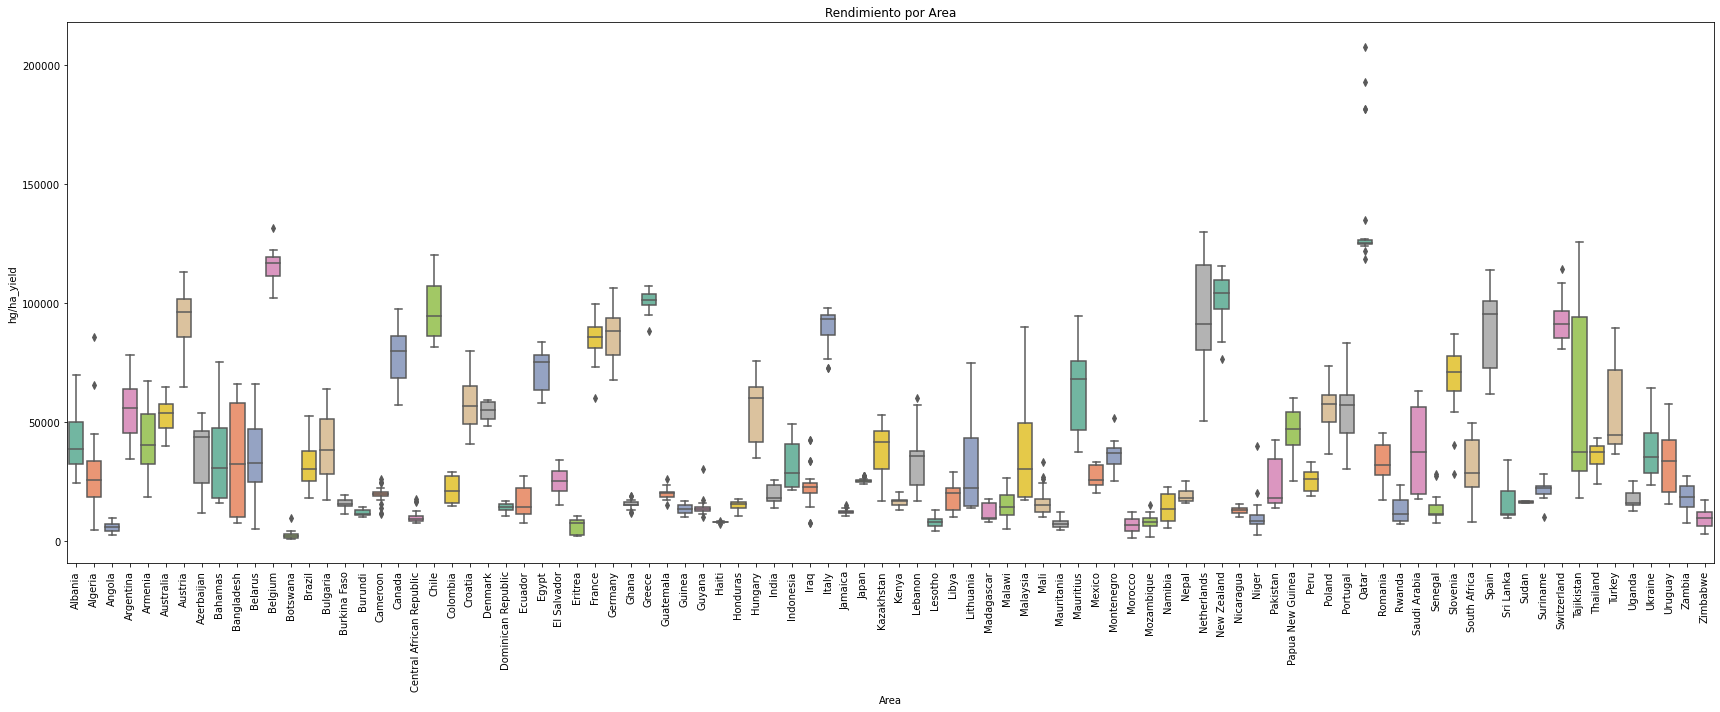

In [99]:
plt.figure(figsize=(24, 10))
sns.boxplot(data=data_fil, x="Area", y="hg/ha_yield", palette="Set2")
plt.title('Rendimiento por Area')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [136]:
resumen_area = data_fil.groupby("Area").agg(
    mediana = ("hg/ha_yield", "median"),
    q1 = ("hg/ha_yield", lambda x: np.quantile(x, 0.25)),
    q3 = ("hg/ha_yield", lambda x: np.quantile(x, 0.75))
)


In [138]:
#Países con mayor rendimiento del cultivo de maíz

resumen_area.sort_values(by= "mediana", ascending=False) 

,mediana,q1,q3
Area,,,
Qatar,125299.0,124633.00,126485.50
Belgium,116872.0,111500.00,119360.00
New Zealand,104000.0,97391.50,109426.00
Greece,101042.0,99132.50,103924.00
Austria,96370.0,85600.00,101471.50
...,...,...,...
Eritrea,7610.5,2473.50,8766.75
Mauritania,7116.0,5918.50,8489.50
Morocco,6632.0,4128.75,9243.50


In [139]:
##Países con menor rendimiento del cultivo de maíz

resumen_area.sort_values(by= "mediana", ascending=True) 


,mediana,q1,q3
Area,,,
Botswana,1899.0,1361.50,2689.00
Angola,5959.0,4350.00,7096.50
Morocco,6632.0,4128.75,9243.50
Mauritania,7116.0,5918.50,8489.50
Eritrea,7610.5,2473.50,8766.75
...,...,...,...
Austria,96370.0,85600.00,101471.50
Greece,101042.0,99132.50,103924.00
New Zealand,104000.0,97391.50,109426.00


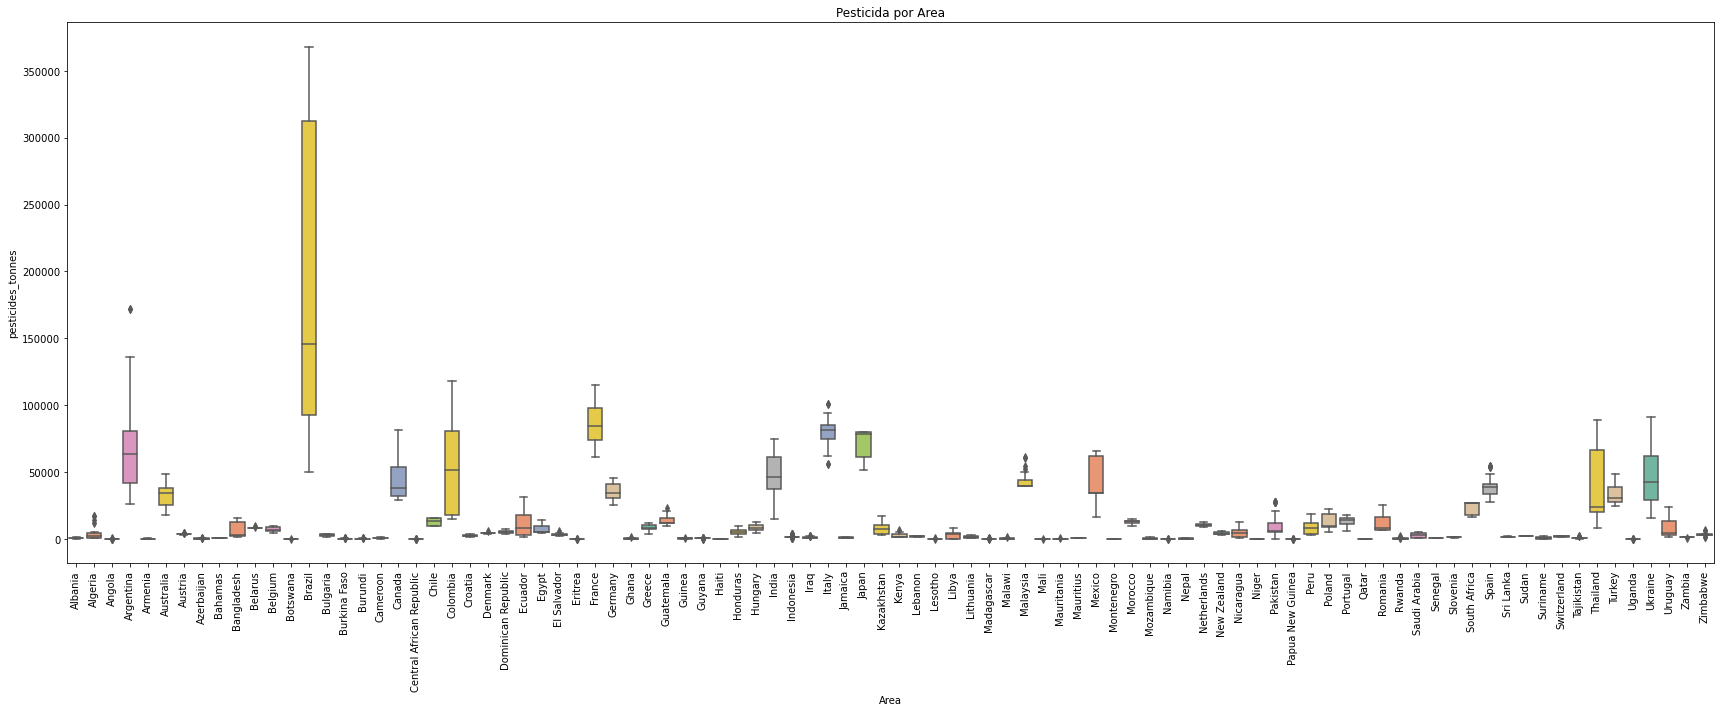

In [167]:
#Países que aplican pesticidas

plt.figure(figsize=(24, 10))
sns.boxplot(data=data_fil, x="Area", y="pesticides_tonnes", palette="Set2")
plt.title('Pesticida por Area')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

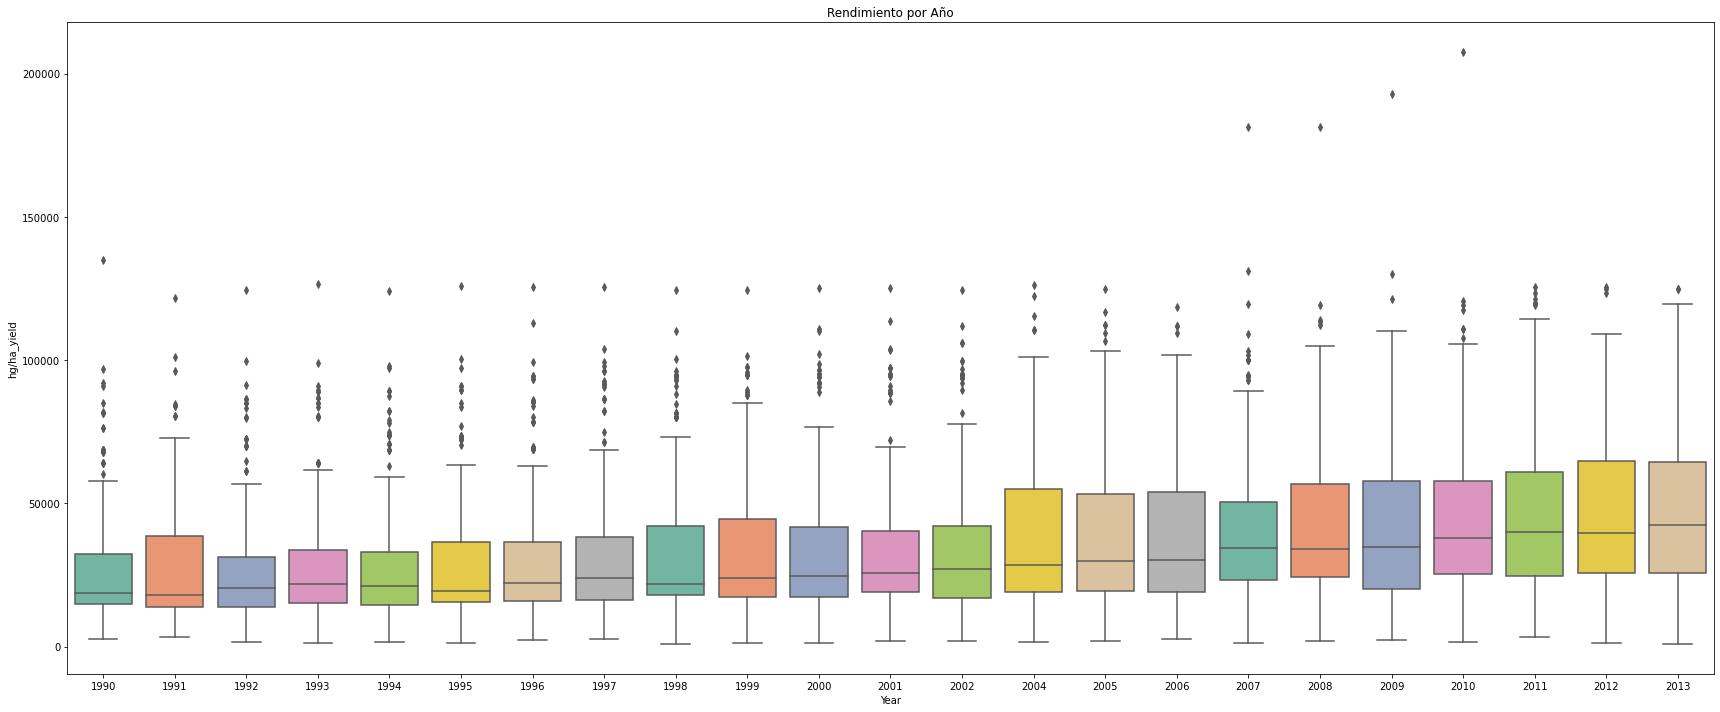

In [117]:
plt.figure(figsize=(24, 10))
sns.boxplot(data=data_fil, x="Year", y="hg/ha_yield", palette="Set2")
plt.title('Rendimiento por Año')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [142]:
resumen_año = data_fil.groupby("Year").agg(
    mediana = ("hg/ha_yield", "median"),
    q1 = ("hg/ha_yield", lambda x: np.quantile(x, 0.25)),
    q3 = ("hg/ha_yield", lambda x: np.quantile(x, 0.75))
)
resumen_año.sort_values(by= "mediana", ascending=False)

,mediana,q1,q3
Year,,,
2013,42313,25726.0,64441.00
2011,39897,24784.0,60979.50
2012,39830,25557.0,64654.00
2010,38052,25401.0,57681.75
2009,34879,20238.0,57763.00
2007,34265,23352.0,50653.00
2008,34154,24140.0,56912.00
2006,30368,19125.0,53856.00
2005,29843,19385.0,53311.00


**Se observa un aumento general del rendimiento del cultivo de maíz con los años**

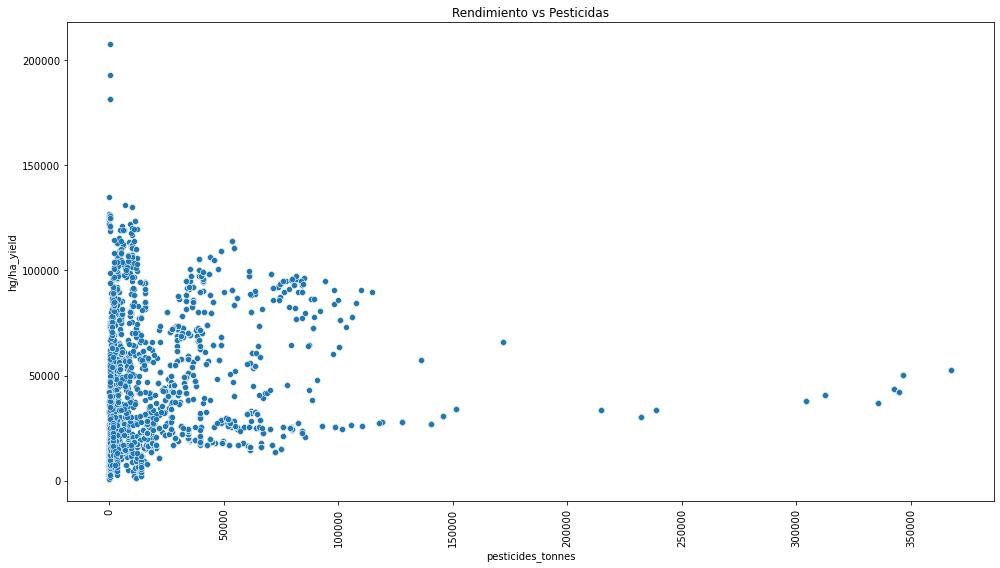

In [107]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=data_fil, x="pesticides_tonnes", y="hg/ha_yield", palette="Set2")
plt.title('Rendimiento vs Pesticidas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [110]:
from scipy.stats import linregress

In [112]:
reg=linregress(x=data_fil["pesticides_tonnes"], y=data_fil["hg/ha_yield"])
reg

LinregressResult(slope=0.03928357741297637, intercept=35022.90557158621, rvalue=0.07738803541558772, pvalue=6.562619669887931e-07, stderr=0.007885639666402402)

**Se observa una tendencia creciente en el rendimiento del cultivo de maíz a medida que aumenta la cantidad de pesticidas aplicados.**

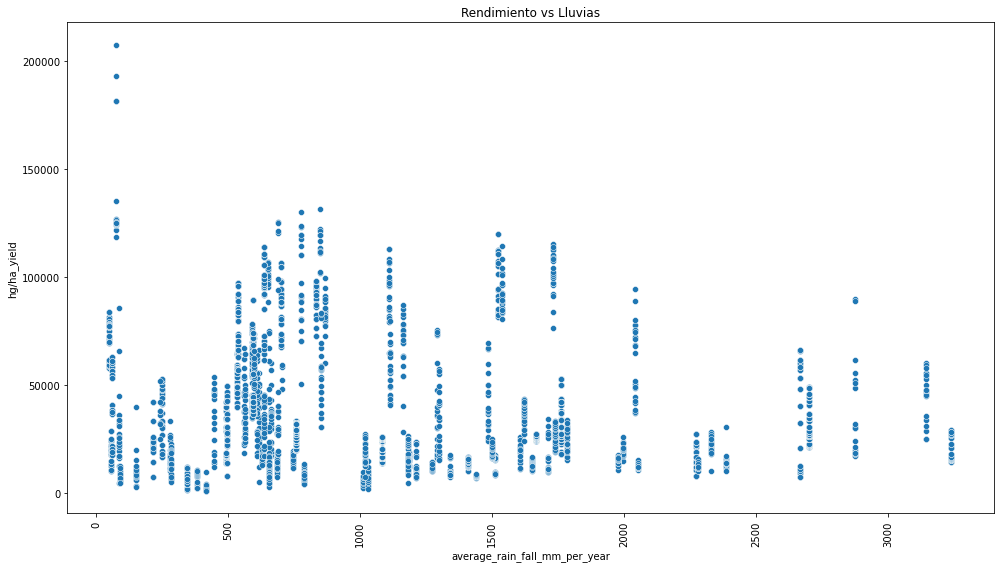

In [104]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=data_fil, x="average_rain_fall_mm_per_year", y="hg/ha_yield", palette="Set2")
plt.title('Rendimiento vs Lluvias')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [113]:
reg=linregress(x=data_fil["average_rain_fall_mm_per_year"], y=data_fil["hg/ha_yield"])
reg

LinregressResult(slope=-6.799241835159928, intercept=43776.48289822317, rvalue=-0.17868547307574434, pvalue=6.541138032141536e-31, stderr=0.5833498141931424)

**En este gráfico se observa un patrón negativo, donde el rendimiento disminuye a medida que aumentan las precipitaciones.**

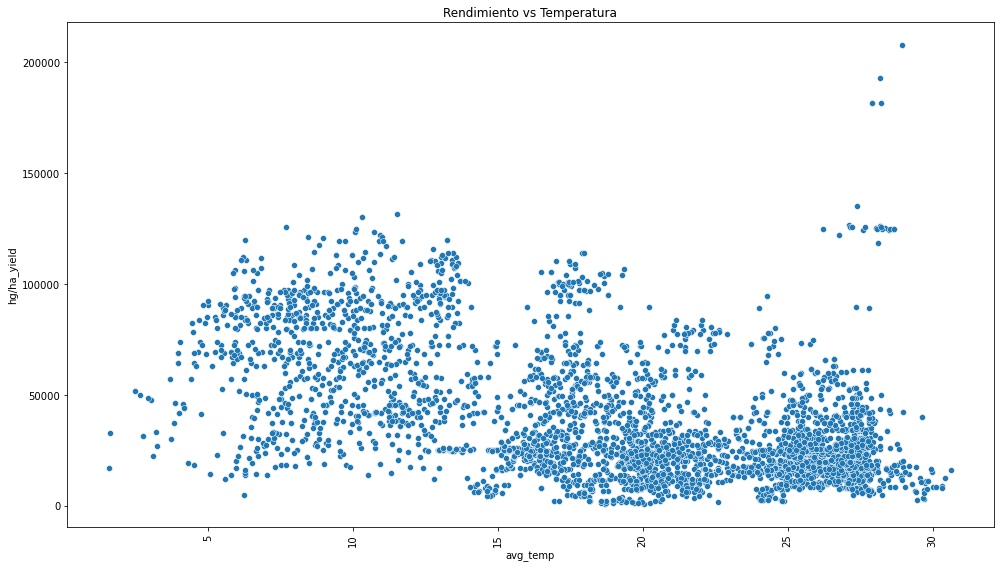

In [105]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=data_fil, x="avg_temp", y="hg/ha_yield", palette="Set2")
plt.title('Rendimiento vs Temperatura')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [114]:
reg=linregress(x=data_fil["avg_temp"], y=data_fil["hg/ha_yield"])
reg

LinregressResult(slope=-2249.9375854958353, intercept=81140.43461452272, rvalue=-0.5452999948606316, pvalue=0.0, stderr=53.889972536976124)

**El rendimiento del maíz tiende a disminuir a medida que aumentan las temperaturas**

### **Se procedió a filtrar los datos en función de los puntos identificados como potencialmente anómalos en los gráficos anteriores.**

In [147]:
data_exp=data_fil[(data_fil["Area"]=="Qatar")|(data_fil["hg/ha_yield"]>150000 )| (data_fil["pesticides_tonnes"] > max)]
data_exp

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
715,Argentina,Maize,2012,57346,591.0,136185.08,18.18
716,Argentina,Maize,2012,57346,591.0,136185.08,18.43
731,Argentina,Maize,2013,66037,591.0,171945.54,16.45
732,Argentina,Maize,2013,66037,591.0,171945.54,16.88
3246,Brazil,Maize,1997,26228,1761.0,110276.11,21.91
...,...,...,...,...,...,...,...
23789,Qatar,Maize,2009,192857,74.0,68.00,28.17
23792,Qatar,Maize,2010,207556,74.0,68.00,28.93
23795,Qatar,Maize,2011,125556,74.0,68.00,28.23
23798,Qatar,Maize,2012,124894,74.0,68.00,28.54


In [149]:
data_qatar=data_fil[(data_fil["Area"]=="Qatar")]
data_qatar

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
23735,Qatar,Maize,1990,135000,74.0,3.0,27.38
23738,Qatar,Maize,1991,121818,74.0,3.0,26.77
23741,Qatar,Maize,1992,124583,74.0,3.0,26.22
23744,Qatar,Maize,1993,126667,74.0,3.0,27.10
23747,Qatar,Maize,1994,124074,74.0,3.0,27.59
23750,Qatar,Maize,1995,125806,74.0,4.0,27.16
23753,Qatar,Maize,1996,125692,74.0,6.0,27.66
23756,Qatar,Maize,1997,125694,74.0,21.5,27.23
23759,Qatar,Maize,1998,124348,74.0,37.0,28.48
23762,Qatar,Maize,1999,124639,74.0,52.5,28.62


**A diferencia del patrón general, en Qatar se observan valores muy altos de rendimiento incluso con bajos niveles de pesticidas. Esto podría deberse a dos posibles causas: 1) un posible error en el registro de las variables de pesticida o rendimiento, o 2) la existencia de otras condiciones que expliquen este patrón inverso, como la implementación de prácticas agrícolas más sustentables.**

**Además, es probable que el tipo de pesticida utilizado (químico o biológico) influya en los patrones observados. Contar con esta información permitiría que nuestras predicciones sean más precisas.**

**Aunque se podría considerar filtrar estos datos antes de ejecutar los modelos, dado que representan solo un 0,6% del total y no hay certeza de que sean realmente atípicos, se decidió mantenerlos en el análisis.**

- **Correlación entre variables predictoras**

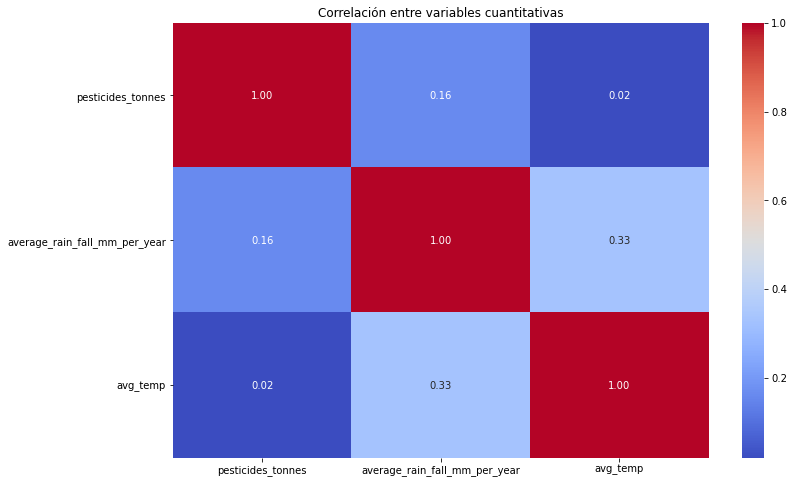

In [109]:
corr_data = data_fil[["pesticides_tonnes", "average_rain_fall_mm_per_year", "avg_temp"]]

# Calculamos la matriz de correlación
corr_matrix = corr_data.corr()

# Graficamos el heatmap
plt.figure(figsize=(12, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables cuantitativas')
plt.show()

**No se detectaron correlaciones significativas entre las variables cuantitativas predictoras, por lo que todas podrían incorporarse al modelo predictivo sin riesgo de multicolinealidad.**

In [168]:
data_fil.to_csv("../dataset/data_fil.csv", index=False)